# PCA (Principal Components Analysis)

PCA est un algorithme de réduction de dimmension, qui a la capacité de réunir en amont de l'entraînement les informations les plus importantes dans peu de features. 

Cette technique permet:
* Un gain de temps (moins de features à entraîner)
* Un gain d'espace (les informations les plus importantes se retrouves compréssé dans moins de features, plutôt que d'être séparer dans pleins de colonnes).

---

L'objectif de PCA est de trouver la meilleure "combinaison linéaire" de caractéristiques/colonnes qui représentent le mieux la structure sous-jacente des données.

# La malédiction de la dimmensionnalité

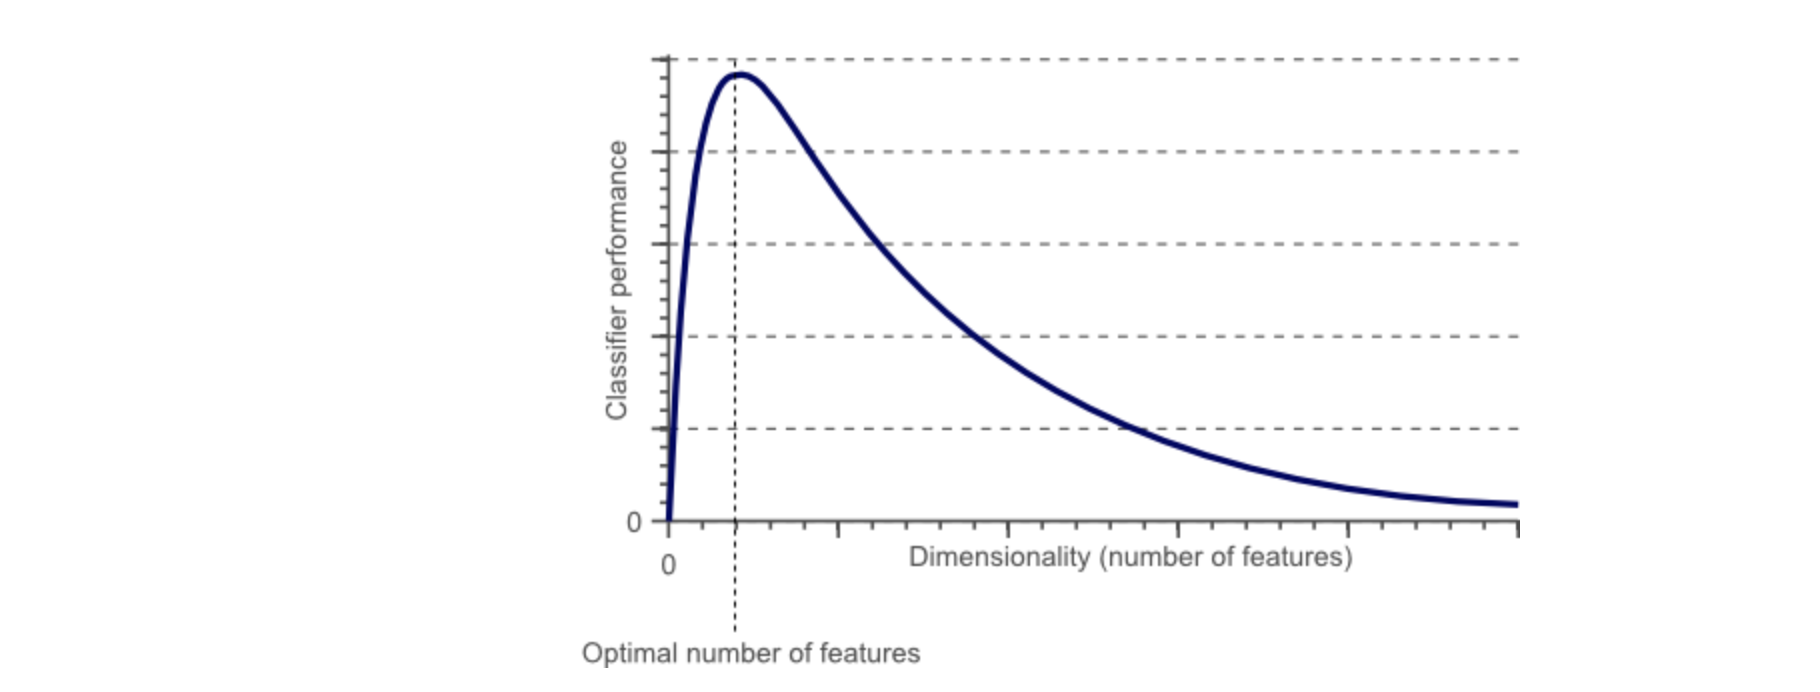

À mesure que le nombre de caractéristiques ou de dimensions augmente, la quantité de données dont nous avons besoin pour généraliser avec précision croît de manière exponentielle,

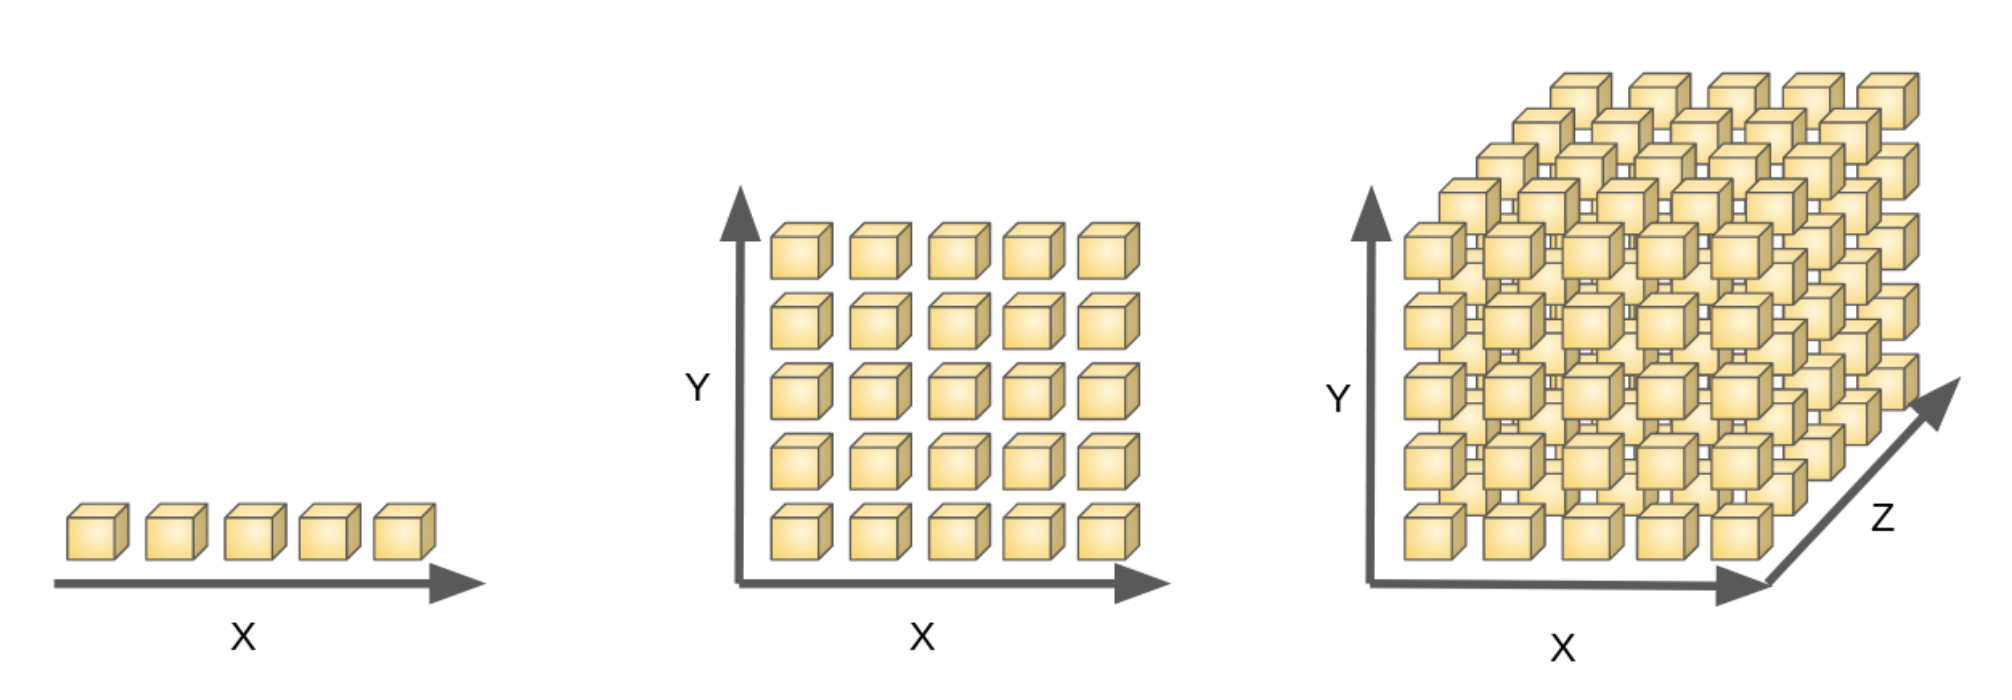

`PCA` permet de contourner la malédiction de la dimmensionnalité, car cette technique permet de condenser les informations pertinentes qui sont répartis entre toutes les features (les dimmensions) dans très peu de feature (par exemple 2 features).

# Collinéarité entre features

La collinéarité entre deux features (différentes de y) induit inévitablement de la redondance d'information.  
La colinéarité entre features va favoriser l'ajout de bruit autour d'une feature, donc c'est à bannir.

# Combinaison linéaire

Le principe de PCA, c'est qu'il va trouver la meilleure combinaison linéaire possible de nos features, en créant de nouvelles features, à partir de nos features déjà existantes.

Deux Conséquence du PCA :
* Cet algorithme va d'une part, casser toute colinéarité, donc tout les nouvelles features ne sauront pas du tout corrélé entre elles.

* PCA va aussi ranger ses nouvelles features, par ordre d'importance. X1' est porteur de plus d'informations, que X2', que X3', et ainsi de suite...

Afin de cassé toute colinéarité entre nos features, le principe de `PCA` est le suivant:  
*Projeter nos données sur des axes appelés "Composantes Principales".  
On réduit le nombre de dimmensions de notre dataset tout en préservant un maximum de variance.*

Si nous ne devions garder que deux dimensions pour décrire nos données,
ces dimensions devrait:

* Préserver la plus grande partie de la variance des données lorsqu'elles sont projetées sur elle (dispersion des points rouges)
* minimiser les "erreurs de reconstruction" (lignes rouges)

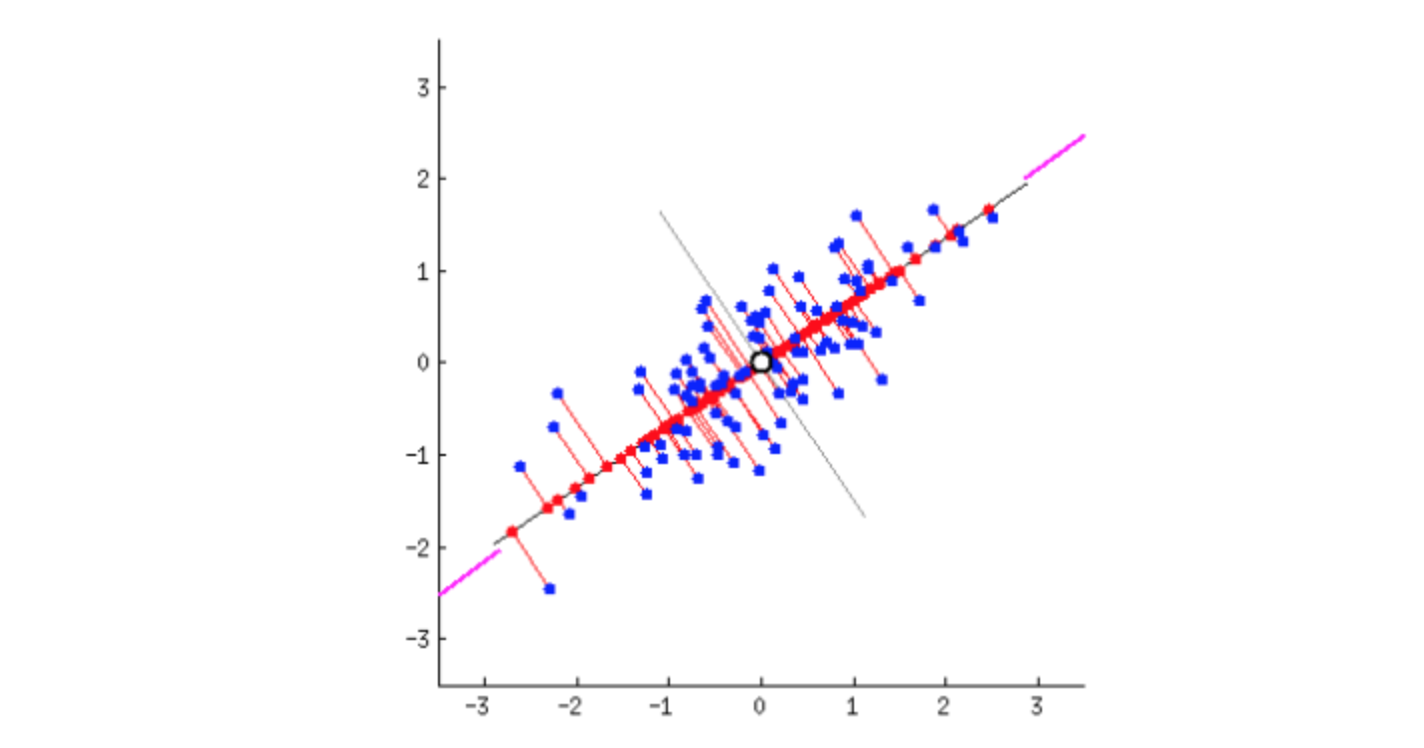

[PCA - différents niveaux de compréhension](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues/140579#140579)

[Visualisation intéractives](https://setosa.io/ev/principal-component-analysis/)

Voyons un exemple avec un jeu de données sur des bouteilles de vin. Notre jeu de données contient 178 bouteilles de vin, avec 13 caractéristiques. 
Il y a 3 classes de vins différents. Il s'agit donc d'un cas de Multiclassification.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine 
wine = load_wine()
X = wine.data
y = wine.target

pd.DataFrame(X, columns = wine.feature_names)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
 wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

# Standardisation

In [ ]:
#⚠️ Il est préférable que les données soient centrées sur la moyenne de leur caractéristique avant d'appliquer PCA. ⚠️
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
wine_df = pd.DataFrame(X, columns = wine.feature_names)
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

# Observons la corrélation entre les features.

Observons la corrélation entre les features.

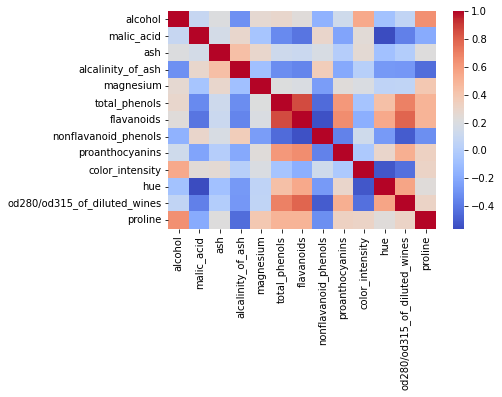

In [ ]:
sns.heatmap(wine_df.corr(),cmap = "coolwarm")

Il existe des corrélation fortement positive entre certaines features. Il y a donc une redondance de l'information.
PCA permet d'extraire la variance au maximum dans ce jeu de données.

# PCA's on Fire

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(X)

PCA()

En entraînant PCA sans signifier de valeur pour l'hyperparamètre `n_components`, on à 13 PCA components, car 13 caractéristiques.

In [ ]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

Les deux premières composantes principales contiennent + de 50% de la variance expliquée.

In [ ]:
wine_df.shape[1]

13

In [ ]:
pd.DataFrame(pca.components_.T, index =wine.feature_names, columns = [f'PC{i}' for i in range(1, int(wine_df.shape[1]) + 1)])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
alcohol,0.144329,-0.483652,-0.207383,-0.017856,-0.265664,-0.213539,-0.056396,-0.396139,0.508619,0.211605,-0.225917,-0.266286,0.014970
malic_acid,-0.245188,-0.224931,0.089013,0.536890,0.035214,-0.536814,0.420524,-0.065827,-0.075283,-0.309080,0.076486,0.121696,0.025964
ash,-0.002051,-0.316069,0.626224,-0.214176,-0.143025,-0.154475,-0.149171,0.170260,-0.307694,-0.027125,-0.498691,-0.049622,-0.141218
alcalinity_of_ash,-0.239320,0.010591,0.612080,0.060859,0.066103,0.100825,-0.286969,-0.427970,0.200449,0.052799,0.479314,-0.055743,0.091683
magnesium,0.141992,-0.299634,0.130757,-0.351797,0.727049,-0.038144,0.322883,0.156361,0.271403,0.067870,0.071289,0.062220,0.056774
total_phenols,0.394661,-0.065040,0.146179,0.198068,-0.149318,0.084122,-0.027925,0.405934,0.286035,-0.320131,0.304341,-0.303882,-0.463908
flavanoids,0.422934,0.003360,0.150682,0.152295,-0.109026,0.018920,-0.060685,0.187245,0.049578,-0.163151,-0.025694,-0.042899,0.832257
nonflavanoid_phenols,-0.298533,-0.028779,0.170368,-0.203301,-0.500703,0.258594,0.595447,0.233285,0.195501,0.215535,0.116896,0.042352,0.114040
proanthocyanins,0.313429,-0.039302,0.149454,0.399057,0.136860,0.533795,0.372139,-0.368227,-0.209145,0.134184,-0.237363,-0.095553,-0.116917
color_intensity,-0.088617,-0.529996,-0.137306,0.065926,-0.076437,0.418644,-0.227712,0.033797,0.056218,-0.290775,0.031839,0.604222,-0.011993


Chaque Composante Principale est une combinaison linéaire des caractéristiques initiales du jeu de donneés.

# Application de PCA à notre jeu de données (transformation)

On va maintenant projeter notre jeu de données (178 bouteilles) dans ce nouvelle espace (13 PCs).

In [ ]:
pd.DataFrame(X, columns= wine.feature_names)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


`PCA.transform()` ne fait rien d'autre qu'une combinaison linéaire de chacune des 178 bouteilles et des Composantes Principales.

In [ ]:
# (valeur standardisé pour la première bouteille - alcohol) * (valeur PC1 - alcohol), ......
(1.518613 * 0.144329) + \
(-0.245188 * -0.562250) + \
(-0.002051 * 0.232053) + \
(-0.239320	* -1.169593) + \
(0.141992 * 1.913905	) + \
(0.394661 * 0.808997) + \
(0.422934	* 1.034819 ) + \
(-0.298533 * -0.659563	) + \
(0.313429 * 1.224884) + \
(-0.088617 * 0.251717 ) + \
(0.296715 * 0.362177) + \
(0.376167 * 1.847920) + \
(	0.286752 * 1.013009)

3.316748118346

In [ ]:
Xp = pca.transform(X)

X_proj = pd.DataFrame(Xp, columns = [f'PC{i}' for i in range(1, int(wine_df.shape[1]) + 1)])
X_proj

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0.139228,0.170786,-0.114427
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0.258198,-0.279431,-0.187371
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0.512492,0.698766,0.072078
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,0.339821,-0.021866


On a donc nos 178 bouteilles, exprimés chacune par une combinaison linéaire des 13 PCAs.

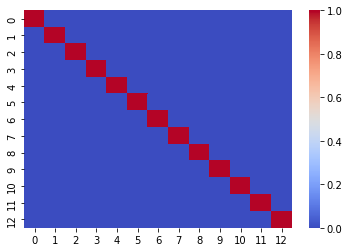

In [ ]:
sns.heatmap(pd.DataFrame(Xp).corr(), cmap = "coolwarm")

Et comme on pouvait s'y attendre, il n'y a plus aucune corrélation entre les features. On dit que la multicolinéarité est réduite au maximum.

# Observons nos bouteilles de vin, avant et après PCA.

Ne pouvant représenter les données dans un espace à 13 dimensions, on va se contenter des deux premières caractéristiques.

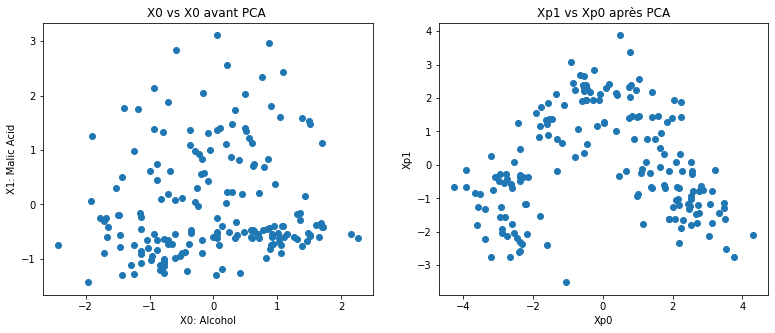

In [ ]:
plt.figure(figsize = (13,5))

plt.subplot(1,2,1)
plt.title("X0 vs X0 avant PCA ") 
plt.xlabel('X0: Alcohol')
plt.ylabel("X1: Malic Acid")
plt.scatter(X[:,0], X[:,1])

plt.subplot(1,2,2)
plt.title("Xp1 vs Xp0 après PCA")
plt.xlabel('Xp0')
plt.ylabel("Xp1")
plt.scatter(Xp[:,0], Xp[:,1])

Pour l'instant, on ne distingue pas les classes. Ajoutons donc les labels à nos bouteilles de vin.

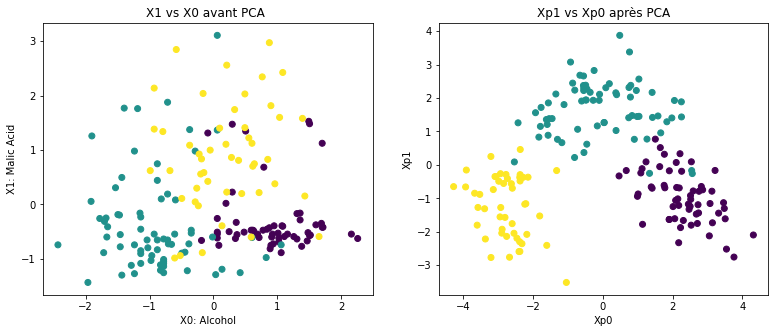

In [ ]:
plt.figure(figsize = (13,5))

plt.subplot(1,2,1)
plt.title("X1 vs X0 avant PCA ") 
plt.xlabel('X0: Alcohol')
plt.ylabel("X1: Malic Acid")
plt.scatter(X[:,0], X[:,1], c = y)

plt.subplot(1,2,2)
plt.title("Xp1 vs Xp0 après PCA")
plt.xlabel('Xp0')
plt.ylabel("Xp1")
plt.scatter(Xp[:,0], Xp[:,1], c = y)

On observe qu'avec les composantes PC1 et PC2, on arrive mieux à distinguer/séparer les données.

# La taux de variance expliquée

In [ ]:
pc_explained_variance_ratio = pd.DataFrame(pca.explained_variance_ratio_).T
pc_explained_variance_ratio.columns = [f'PC{i}' for i in range(1, int(wine_df.shape[1]) + 1)]
pc_explained_variance_ratio.index = ["ratio"]
pc_explained_variance_ratio

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
ratio,0.361988,0.192075,0.111236,0.07069,0.065633,0.049358,0.042387,0.026807,0.022222,0.0193,0.017368,0.012982,0.007952


# Importances des Composantes Principales
### Calcul du ratio de la variance expliquée

1 - On observe que pour chaque colonne (dont chaque valeur sont le résultat d'une combinaison linéaire des bouteilles et des composantes principales), la valeur de l'écart type est de moins en moins grande.

In [ ]:
df_Xp = pd.DataFrame(Xp)
df_Xp.std()

0     2.175417
1     1.584639
2     1.205920
3     0.961335
4     0.926309
5     0.803295
6     0.744407
7     0.592002
8     0.538992
9     0.502315
10    0.476513
11    0.411975
12    0.322431
dtype: float64

2 - Je calcule l'écart type au carré, pour obtenir la variance.

In [ ]:
var = df_Xp.std() ** 2
var

0     4.732437
1     2.511081
2     1.454242
3     0.924166
4     0.858049
5     0.645282
6     0.554141
7     0.350466
8     0.290512
9     0.252320
10    0.227064
11    0.169724
12    0.103962
dtype: float64

3 - En divisant la variance de chaque colonne, par le total de la variance des colonnes, j'obtiens un ratio de variance pour chaque colonne.

In [ ]:
# Ratio de la variance expliquée
df_Xp.std()**2 / ((df_Xp.std()**2).sum())

0     0.361988
1     0.192075
2     0.111236
3     0.070690
4     0.065633
5     0.049358
6     0.042387
7     0.026807
8     0.022222
9     0.019300
10    0.017368
11    0.012982
12    0.007952
dtype: float64

In [ ]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [ ]:
pca.explained_variance_

array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
       0.64528221, 0.55414147, 0.35046627, 0.29051203, 0.25232001,
       0.22706428, 0.16972374, 0.10396199])

# La méthode du coude

On peut utiliser la méthode du coude pour ne préserver que les PCA qui préservent le maximum d'informations pour notre modèle.

La méthode du coude permet d'observer visuellement le taux de variance expliqué par Composante Principale.

Text(0, 0.5, '% variance expliquée')

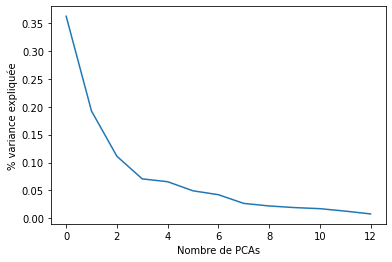

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Nombre de PCAs")
plt.ylabel("% variance expliquée")

On peut utilisé np.cumsum pour faire une somme cumulé. On pourrait arbitrairement décider d'un compromis, avoir 80% de la variance expliquée. Dans ce cas, on exploitera que les 5 premières composantes principales.
* Les 5, et non les 4, car la première PC commence à 0.

Text(0, 0.5, '% variance expliquée')

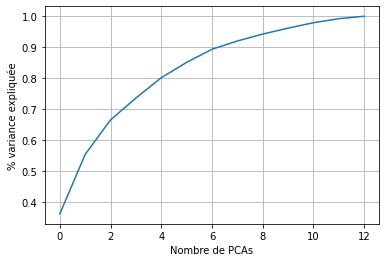

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.xlabel("Nombre de PCAs")
plt.ylabel("% variance expliquée")

In [ ]:
cum_sum = np.cumsum(pca.explained_variance_ratio_)
print(cum_sum)
n_comp = np.argmax(cum_sum > 0.80) + 1

n_comp

[0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785
 1.        ]


5

Alternative pour réunir les Composantes Principales qui englobent au moins 80% de la variance expliquée:

In [ ]:
pca = PCA(n_components = 0.80).fit(wine_df)
pd.DataFrame(pca.components_.T, columns = [f'PC{i}' for i in range(1, (pca.n_components_) + 1)], index = wine.feature_names )

,PC1,PC2,PC3,PC4,PC5
alcohol,0.144329,-0.483652,-0.207383,-0.017856,-0.265664
malic_acid,-0.245188,-0.224931,0.089013,0.536890,0.035214
ash,-0.002051,-0.316069,0.626224,-0.214176,-0.143025
alcalinity_of_ash,-0.239320,0.010591,0.612080,0.060859,0.066103
magnesium,0.141992,-0.299634,0.130757,-0.351797,0.727049
total_phenols,0.394661,-0.065040,0.146179,0.198068,-0.149318
flavanoids,0.422934,0.003360,0.150682,0.152295,-0.109026
nonflavanoid_phenols,-0.298533,-0.028779,0.170368,-0.203301,-0.500703
proanthocyanins,0.313429,-0.039302,0.149454,0.399057,0.136860
color_intensity,-0.088617,-0.529996,-0.137306,0.065926,-0.076437


On peut maintenant entraîner un modèle sur un jeu de données qui a moins de dimensions. Plutôt que d'utiliser les 13 caractéristiques des bouteilles de vin, on peut utiliser par exemple les 5 Composantes Principales. On passe donc de 13 à 5 dimensions.

#Test de modèle sans PCA

In [ ]:
# X contain 13 features
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model = LogisticRegression()

print("accuracy all features")
cross_val_score(model, wine_df, y, cv = 10).mean()

accuracy all features


0.9777777777777779

### Test de modèles après PCA, en sélectionnant les 2 Principales Composantes.

In [ ]:
pca = PCA(n_components = 5).fit(wine_df)
pd.DataFrame(pca.components_.T, columns = [f'PC{i}' for i in range(1, (pca.n_components_) + 1)], index = wine.feature_names )

,PC1,PC2,PC3,PC4,PC5
alcohol,0.144329,-0.483652,-0.207383,-0.017856,-0.265664
malic_acid,-0.245188,-0.224931,0.089013,0.536890,0.035214
ash,-0.002051,-0.316069,0.626224,-0.214176,-0.143025
alcalinity_of_ash,-0.239320,0.010591,0.612080,0.060859,0.066103
magnesium,0.141992,-0.299634,0.130757,-0.351797,0.727049
total_phenols,0.394661,-0.065040,0.146179,0.198068,-0.149318
flavanoids,0.422934,0.003360,0.150682,0.152295,-0.109026
nonflavanoid_phenols,-0.298533,-0.028779,0.170368,-0.203301,-0.500703
proanthocyanins,0.313429,-0.039302,0.149454,0.399057,0.136860
color_intensity,-0.088617,-0.529996,-0.137306,0.065926,-0.076437


In [ ]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294])

In [ ]:
Xp = pca.fit_transform(wine_df)

pd.DataFrame(Xp, columns =  [f'PC{i}' for i in range(1, (pca.n_components_) + 1)])

,PC1,PC2,PC3,PC4,PC5
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655
2,2.516740,-1.031151,0.982819,0.724902,-0.251033
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842
4,1.008908,-0.869831,2.026688,-0.409766,0.298458
...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164
174,-2.601956,-1.757229,0.207581,0.349496,0.255063
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955


On entraîne un modèle avec deux composantes principales, donc deux colonnes, plutôt que les 13 colonnes du jeu de données de base.

In [ ]:
print("accuracy avec 5 Features:")

model = LogisticRegression()

cross_val_score(model, Xp, y, cv = 10).mean()

accuracy avec 5 Features:


0.9833333333333334

Avec seulement 2 features, on a une accuracy de 95,5%.
J'ai perdu 11 colonnes, pour perdre seulement 2% d'accuracy.
Avec 5 features, on a une accuracy de 98,3%. 

Grâce à PCA, on peut:

* Obtenir des combinaisons linéaires plus puissantes que les features de base
* Réduire la compléxité du modèle car moins de features

Cependant, il y a quelques limites:

* On perd de l'information, et surtout, de l'interprétabilité.
* Si on a vraiment besoin de préserver l'interprétabilité, il ne faut pas utiliser PCA.